<a href="https://colab.research.google.com/github/HaloGamer33/Python-ProyectoParcial2/blob/main/python_proyectoparcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpieza Base de Datos

In [ ]:
"""
Limpiado inicial de la base de datos.

1. Eliminar todos los valores nulos.
2. Separar los buenos candidatos de los malos en dos dataframe.
3. Revisar cual de los dataframe tiene menos valores e igualar.
4. Juntar los dataframe en uno solo.

En este caso la cantidad de malos candidatos es menor a la de buenos candidatos,
entonces tenemos que contar cuantos candidatos malos tenemos y de manera aleatoria
tomar esa cantidad de candidatos buenos.

Ejemplo:

No. Buenos candidatos = 700
No. Malos candidatos  = 500

De manera aleatoria seleccionamos 500 buenos candidatos, y esos seran parte
de la base de datos final. Esta se vería así

No. Buenos candidatos = 500 (tomados de manera aleatoria de los 700 anteriores)
No. Malos candidatos  = 500
"""

listado = pd.read_csv("/content/Employee.csv")
listado.dropna(inplace = True)

leave_workers = listado[listado["LeaveOrNot"] == 1]
stay_workers = listado[listado["LeaveOrNot"] == 0]
stay_workers = stay_workers.sample(n = 1600)

frames = [stay_workers, leave_workers]
listado = pd.concat(frames)
listado.head

listado.to_csv()

# Inicialización DataFrame

In [ ]:
# Imports y lectura de DB
import pandas as pd
import sklearn
import numpy as np
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

listado = pd.read_csv("/content/Employee.csv")

In [ ]:
# Remplazo de todos los valores strings a ints.

listado = pd.read_csv('/content/Employee.csv')
listado['Education'].mask(listado['Education'] == 'Bachelors', '1', inplace=True)
listado['Education'].mask(listado['Education'] == 'Masters', '2', inplace=True)
listado['Education'].mask(listado['Education'] == 'PHD', '3', inplace=True)

listado['City'].mask(listado['City'] == 'Bangalore', '1', inplace=True)
listado['City'].mask(listado['City'] == 'New Delhi', '2', inplace=True)
listado['City'].mask(listado['City'] == 'Pune', '3', inplace=True)

listado['Gender'].mask(listado['Gender'] == 'Female', '1', inplace=True)
listado['Gender'].mask(listado['Gender'] == 'Male', '2', inplace=True)

listado['EverBenched'].mask(listado['EverBenched'] == 'Yes', '1', inplace=True)
listado['EverBenched'].mask(listado['EverBenched'] == 'No', '0', inplace=True)

listado

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,1,2016,1,3,28,2,1,4,0
1,1,2016,1,3,33,1,0,3,0
2,1,2014,1,3,27,1,0,5,0
3,1,2012,1,3,38,2,0,3,0
4,1,2017,1,3,29,2,0,0,0
...,...,...,...,...,...,...,...,...,...
3195,1,2017,1,3,28,2,0,0,1
3196,1,2016,1,1,33,1,0,0,1
3197,1,2015,3,3,32,1,1,1,1
3198,2,2013,3,2,37,2,0,2,1


# Separado entre Training y Test

In [ ]:
kmeans = KMeans(n_clusters=2)
stay_workers = listado[listado['LeaveOrNot'] == 0]
leave_workers = listado[listado['LeaveOrNot'] == 1]

# Sample 2 rows from the DataFrame
training_stay = stay_workers.sample(n=1280, replace=False)
training_leave = leave_workers.sample(n=1280, replace=False)

# Remove the sampled rows from the original DataFrame
test_stay = stay_workers.drop(training_stay.index)
test_leave = leave_workers.drop(training_leave.index)

listado_training = [training_leave, training_stay]
listado_testing = [test_leave, test_stay]

listado_training = pd.concat(listado_training)
listado_testing = pd.concat(listado_testing)

labels_correct = listado_training['LeaveOrNot']
listado_training.drop(columns='LeaveOrNot', inplace=True)

labels_test_correct = listado_testing['LeaveOrNot']
listado_testing.drop(columns='LeaveOrNot', inplace=True)

# Entrenamiento KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(listado_training, labels_correct)

predicted_values = knn.predict(listado_testing)


# Calculate accuracy, mean squared error (MSE), bias and variance
accuracy = accuracy_score(labels_test_correct, predicted_values)
mse = np.mean((predicted_values - labels_test_correct) ** 2)
bias = np.mean(predicted_values) - np.mean(labels_test_correct)
variance = np.mean((predicted_values - np.mean(predicted_values)) ** 2)

# Print testing results
print("Accuracy:", accuracy)
print("MSE:", mse)
print("Bias:", bias)
print("Variance:", variance)

Accuracy: 0.6765625
MSE: 0.3234375
Bias: -0.02656249999999999
Variance: 0.24929443359375


# Entrenamiento SVM

In [ ]:
clf = svm.SVC()
clf.fit(listado_training, labels_correct)

predicted_values = clf.predict(listado_testing)


# Calculate accuracy, mean squared error (MSE), bias and variance
accuracy = accuracy_score(labels_test_correct, predicted_values)
mse = np.mean((predicted_values - labels_test_correct) ** 2)
bias = np.mean(predicted_values) - np.mean(labels_test_correct)
variance = np.mean((predicted_values - np.mean(predicted_values)) ** 2)

# Print testing results
print("Accuracy:", accuracy)
print("MSE:", mse)
print("Bias:", bias)
print("Variance:", variance)

Accuracy: 0.5359375
MSE: 0.4640625
Bias: 0.25468749999999996
Variance: 0.18513427734375


# Entrenamiento arboles de decisión

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(listado_training, labels_correct)

predicted_values = clf.predict(listado_testing)


# Calculate accuracy, mean squared error (MSE), bias and variance
accuracy = accuracy_score(labels_test_correct, predicted_values)
mse = np.mean((predicted_values - labels_test_correct) ** 2)
bias = np.mean(predicted_values) - np.mean(labels_test_correct)
variance = np.mean((predicted_values - np.mean(predicted_values)) ** 2)

# Print testing results
print("Accuracy:", accuracy)
print("MSE:", mse)
print("Bias:", bias)
print("Variance:", variance)

Accuracy: 0.7328125
MSE: 0.2671875
Bias: -0.02656249999999999
Variance: 0.24929443359375006


# Red  Neuronal

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(40,), max_iter=1000, solver='adam', random_state=42)
clf.fit(listado_training, labels_correct)

predicted_values = clf.predict(listado_testing)


# Calculate accuracy, mean squared error (MSE), bias and variance
accuracy = accuracy_score(labels_test_correct, predicted_values)
mse = np.mean((predicted_values - labels_test_correct) ** 2)
bias = np.mean(predicted_values) - np.mean(labels_test_correct)
variance = np.mean((predicted_values - np.mean(predicted_values)) ** 2)

# Print testing results
print("Accuracy:", accuracy)
print("MSE:", mse)
print("Bias:", bias)
print("Variance:", variance)

Accuracy: 0.5625
MSE: 0.4375
Bias: 0.19999999999999996
Variance: 0.20999999999999996


In [ ]:
labels_test_correct

1600    1
1604    1
1606    1
1609    1
1613    1
       ..
1573    0
1584    0
1586    0
1588    0
1599    0
Name: LeaveOrNot, Length: 640, dtype: int64

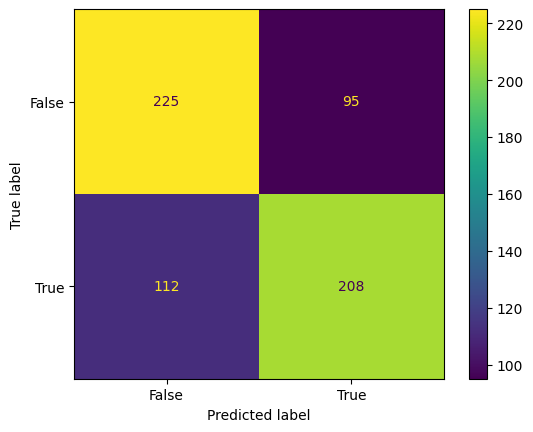

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = confusion_matrix(labels_test_correct, predicted_values)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
